## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

We need to find out whether a Brown proportion of 0.511 is an extreme result if the null hypothesis holds. We will compute the sampling distribution of the proportion under a true Brown fraction of 0.50. If it's lower, the p-value will be even lower.

In [9]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [10]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

<AxesSubplot:>

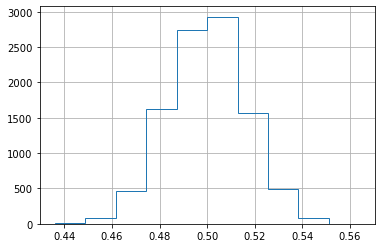

In [11]:
dist.Brown.hist(histtype='step')

In [13]:
pval = 100 - scipy.stats.percentileofscore(dist.Brown,0.511)

In [14]:
pval

24.295

In [15]:
## this value is not enough to reject the null hypothesis
## that green ties or wins

In [16]:
largepoll = pd.read_csv('poll-larger.csv')

In [17]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [18]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range (1000)]})

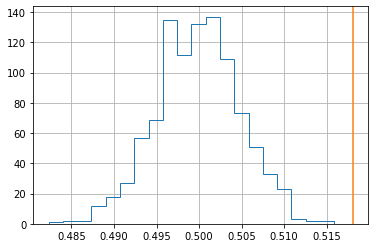

In [19]:
dist.Green.hist(histtype='step', bins=20)
plt.axvline(0.5181, c='C1')

Here, the value is so extreme that it's note even included in our finite sampling distribution. We can conclude that the null hypothesis that Brown wins or ties is one over 1000 or less, which qualifies as very significant.